In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [3]:
# Step 1: Data Preparation
data = pd.read_csv('GOOGL.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [4]:
# Step 2: Dataset Splitting
train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

In [5]:
# Step 3: Data Sequencing
def create_sequences(data, time_steps=6):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [6]:
# Step 4: Model Training
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=4)

Epoch 1/50
  1/885 [..............................] - ETA: 2:15 - loss: 0.0230

C:\Users\inamd\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


885/885 [==============================] - 63s 71ms/step - loss: 2.5661e-04
Epoch 2/50
885/885 [==============================] - 63s 71ms/step - loss: 4.6412e-05
Epoch 3/50
885/885 [==============================] - 62s 70ms/step - loss: 4.5319e-05
Epoch 4/50
885/885 [==============================] - 62s 70ms/step - loss: 3.9503e-05
Epoch 5/50
885/885 [==============================] - 62s 70ms/step - loss: 3.9772e-05
Epoch 6/50
885/885 [==============================] - 62s 70ms/step - loss: 3.1994e-05
Epoch 7/50
885/885 [==============================] - 64s 73ms/step - loss: 3.4823e-05
Epoch 8/50
885/885 [==============================] - 65s 74ms/step - loss: 2.7810e-05
Epoch 9/50
885/885 [==============================] - 64s 73ms/step - loss: 2.7180e-05
Epoch 10/50
885/885 [==============================] - 65s 74ms/step - loss: 2.3778e-05
Epoch 11/50
885/885 [==============================] - 48s 54ms/step - loss: 1.9919e-05
Epoch 12/50
885/885 [==============================]

In [7]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

28/28 [==============================] - 1s 21ms/step
MAE:  56.161480529347855
MSE:  6332.195479650312
RMSE:  79.57509333736475


In [8]:
# Step 6: Prediction
last_6_days = data['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
X_pred = []
X_pred.append(last_6_days_scaled)
X_pred = np.array(X_pred)
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))
pred_price = model.predict(X_pred)
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for the next day: ', pred_price)

1/1 [==============================] - 0s 35ms/step
Predicted price for the next day:  [[2704.5244]]


C:\Users\inamd\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


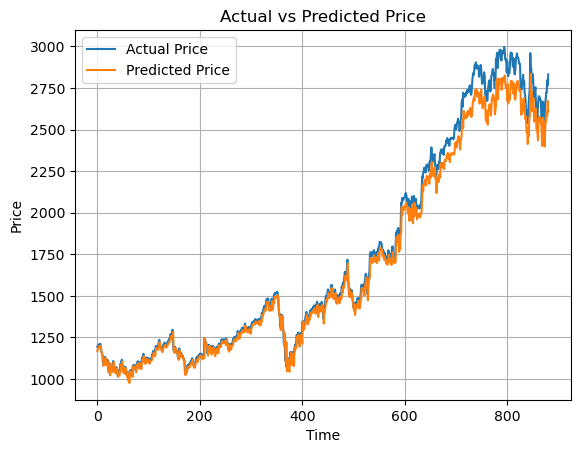

In [9]:
import matplotlib.pyplot as plt

# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()